In [1]:
!pip install -U skrub --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 2.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Preparación de datos
import numpy as np
import pandas as pd
# Misc
from warnings import filterwarnings

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline



In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML3/Producción_Cultivos_ProductosGanaderia_S_Todos_los_Datos_NOFLAG.csv", sep=',', encoding='latin-1')


In [5]:
df

,Código del área,Código del área (M49),Área,Código del producto,Código del producto (CPC),Producto,Código del elemento,Elemento,Unidad,Y1961,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afganistán,268,'21631.01,"Aceite de girasol, en bruto",5510,Producción,toneladas,2.937750e+03,...,1.376800e+02,9.604600e+02,1.035280e+03,1.804720e+03,3.167460e+03,3.198890e+03,3.130580e+03,2.511670e+03,2.013480e+03,NaN
1,2,'004,Afganistán,290,'21691.07,Aceite de sésamo,5510,Producción,toneladas,2.252800e+03,...,1.333760e+03,1.250000e+03,8.608900e+02,1.042590e+03,1.107840e+03,1.210550e+03,1.407670e+03,2.348420e+03,2.096560e+03,NaN
2,2,'004,Afganistán,331,'2168,"Aceite, algodón",5510,Producción,toneladas,4.997350e+03,...,4.761860e+03,4.832280e+03,5.690840e+03,6.625930e+03,4.176030e+03,6.520000e+03,8.247330e+03,8.349080e+03,8.199220e+03,NaN
3,2,'004,Afganistán,334,'21691.12,"Aceite, linaza",5510,Producción,toneladas,3.531240e+03,...,7.335700e+02,7.900000e+02,5.374630e+03,1.831561e+04,1.969771e+04,2.518083e+04,2.718553e+04,1.598286e+04,8.987860e+03,NaN
4,2,'004,Afganistán,261,'2167,"Aceite, oliva",5510,Producción,toneladas,8.160000e+01,...,5.459300e+02,6.584200e+02,7.113700e+02,7.409000e+02,7.632500e+02,8.121600e+02,8.332500e+02,7.240900e+02,7.282300e+02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79601,5817,'902,Import netos alim en Des,1745,'F1745,Queso (Todos tipos),5510,Producción,toneladas,2.917480e+05,...,1.448935e+06,1.476524e+06,1.483218e+06,1.476686e+06,1.500472e+06,1.525235e+06,1.416998e+06,1.418938e+06,1.331697e+06,NaN
79602,5817,'902,Import netos alim en Des,1720,'F1720,"Raíces&Tubérculos, total",5312,Área cosechada,ha,6.893267e+06,...,1.957011e+07,1.945307e+07,1.994979e+07,2.065808e+07,2.155702e+07,2.182914e+07,2.152827e+07,2.259705e+07,2.296227e+07,23794038.0
79603,5817,'902,Import netos alim en Des,1720,'F1720,"Raíces&Tubérculos, total",5419,Rendimiento,100 g/ha,5.224200e+04,...,9.380400e+04,9.398600e+04,9.428700e+04,9.330100e+04,9.169300e+04,9.657700e+04,9.958700e+04,9.785400e+04,1.005800e+05,101281.0
79604,5817,'902,Import netos alim en Des,1720,'F1720,"Raíces&Tubérculos, total",5510,Producción,toneladas,3.601215e+07,...,1.835763e+08,1.828309e+08,1.881010e+08,1.927428e+08,1.976623e+08,2.108202e+08,2.143944e+08,2.211219e+08,2.309543e+08,240989247.1


In [6]:
data_features = df.columns


In [7]:
data_features

Index(['Código del área', 'Código del área (M49)', 'Área',
       'Código del producto', 'Código del producto (CPC)', 'Producto',
       'Código del elemento', 'Elemento', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [8]:
Columnas = ['Código del área', 'Código del área (M49)',
                          'Código del producto', 'Código del producto (CPC)',
                          'Código del elemento']

df = df.drop(columns=Columnas)


In [9]:
# Cantidad de NaNs por columna
nans_por_columna = df.isna().sum()
print("Cantidad de NaNs por columna:")
print(nans_por_columna)

Cantidad de NaNs por columna:
Área            0
Producto        0
Elemento        0
Unidad          0
Y1961       18758
            ...  
Y2018        7817
Y2019        7803
Y2020        7709
Y2021        7884
Y2022       12747
Length: 66, dtype: int64


In [10]:
df_sin_nans = df.dropna()

df_sin_nans = df_sin_nans.reset_index(drop=True)

df_sin_nans

,Área,Producto,Elemento,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afganistán,"Aceitunas, olivas",Área cosechada,ha,600.0,600.0,600.0,600.0,600.0,600.0,...,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.209000e+03,2.208000e+03,2.206000e+03,2.208000e+03,2.207000e+03,2.207000e+03
1,Afganistán,"Aceitunas, olivas",Rendimiento,100 g/ha,16667.0,18333.0,16667.0,18333.0,16667.0,18333.0,...,3.038500e+04,3.143700e+04,3.396500e+04,3.636600e+04,3.377900e+04,3.462200e+04,3.627100e+04,3.417900e+04,3.450700e+04,3.483100e+04
2,Afganistán,"Aceitunas, olivas",Producción,toneladas,1000.0,1100.0,1000.0,1100.0,1000.0,1100.0,...,6.684790e+03,6.916190e+03,7.472330e+03,8.000600e+03,7.463040e+03,7.645320e+03,8.000960e+03,7.546090e+03,7.616670e+03,7.687240e+03
3,Afganistán,Albaricoques,Área cosechada,ha,4820.0,4820.0,4820.0,5100.0,5370.0,5930.0,...,9.005000e+03,9.005000e+03,9.116000e+03,8.595000e+03,1.806700e+04,1.851000e+04,1.771900e+04,1.748100e+04,2.708200e+04,2.265000e+04
4,Afganistán,Albaricoques,Rendimiento,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,9.994400e+04,9.994400e+04,9.618900e+04,2.081900e+04,7.296000e+04,5.893400e+04,7.300800e+04,7.538900e+04,7.661500e+04,7.527900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,Import netos alim en Des,Ovejas y cabras,Existencias,Cabeza,272582266.0,271387833.0,277107648.0,283628226.0,292004991.0,299591021.0,...,8.048696e+08,8.292806e+08,8.418313e+08,8.714974e+08,8.945766e+08,9.105471e+08,9.640792e+08,9.790694e+08,9.840232e+08,1.004309e+09
51445,Import netos alim en Des,"Raíces&Tubérculos, total",Área cosechada,ha,6893267.0,7032332.0,7177173.0,7211819.0,7449207.0,7341616.0,...,1.957011e+07,1.945307e+07,1.994979e+07,2.065808e+07,2.155702e+07,2.182914e+07,2.152827e+07,2.259705e+07,2.296227e+07,2.379404e+07
51446,Import netos alim en Des,"Raíces&Tubérculos, total",Rendimiento,100 g/ha,52242.0,52597.0,52202.0,53015.0,53742.0,54169.0,...,9.380400e+04,9.398600e+04,9.428700e+04,9.330100e+04,9.169300e+04,9.657700e+04,9.958700e+04,9.785400e+04,1.005800e+05,1.012810e+05
51447,Import netos alim en Des,"Raíces&Tubérculos, total",Producción,toneladas,36012146.0,36987704.0,37466066.0,38233394.0,40033648.0,39768690.0,...,1.835763e+08,1.828309e+08,1.881010e+08,1.927428e+08,1.976623e+08,2.108202e+08,2.143944e+08,2.211219e+08,2.309543e+08,2.409892e+08


In [11]:
categorical_columns = ['Área', 'Elemento', 'Producto', 'Unidad']

# Columnas para StandardScaler
numerical_columns = ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
                     'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978',
                     'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
                     'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
                     'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
                     'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014',
                     'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022']

In [12]:
# Crear el transformador para las columnas categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el transformador para las columnas numéricas
numerical_transformer = StandardScaler()

In [13]:
numerical_data = df_sin_nans[numerical_columns]
categorical_data = df_sin_nans[categorical_columns]

numerical_data.shape, categorical_data.shape

((51449, 62), (51449, 4))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [15]:
scaler.fit(numerical_data)

StandardScaler()

In [16]:
numerical_data_preprocessed = scaler.fit_transform(numerical_data)
numerical_data_preprocessed

array([[-0.09682446, -0.09722933, -0.09755742, ..., -0.10212171,
        -0.10174315, -0.10106154],
       [-0.09585912, -0.09618249, -0.09662636, ..., -0.10138827,
        -0.10102206, -0.10034856],
       [-0.09680042, -0.09719982, -0.09753424, ..., -0.10199925,
        -0.10162238, -0.10094177],
       ...,
       [-0.0937217 , -0.09415977, -0.09456715, ..., -0.09992751,
        -0.09954698, -0.09889632],
       [ 2.06682536,  2.08624963,  2.07351534, ...,  4.97055754,
         5.05426342,  5.1656209 ],
       [10.9990014 , 11.00817596, 11.03225072, ..., 11.86619209,
        11.6463137 , 11.6795098 ]])

In [17]:
from sklearn.preprocessing import OneHotEncoder
from skrub import SimilarityEncoder

In [18]:
encoder = SimilarityEncoder()
encoder

SimilarityEncoder()

In [19]:
encoder.fit(categorical_data)

SimilarityEncoder()

In [20]:
categorical_data_preprocessed = encoder.fit_transform(categorical_data)
categorical_data_preprocessed

array([[1.        , 0.08510638, 0.08      , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.08510638, 0.08      , ..., 0.        , 0.11111111,
        0.        ],
       [1.        , 0.08510638, 0.08      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.11111111,
        0.        ],
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.        ,
        1.        ],
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.04347826,
        0.        ]])

In [21]:
df_numerical_preprocessed = pd.DataFrame(numerical_data_preprocessed, columns=numerical_columns)
df_numerical_preprocessed

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,-0.096824,-0.097229,-0.097557,-0.097471,-0.097434,-0.097349,-0.097600,-0.097741,-0.097998,-0.098263,...,-0.099358,-0.099943,-0.099887,-0.099983,-0.100562,-0.100609,-0.101552,-0.102122,-0.101743,-0.101062
1,-0.095859,-0.096182,-0.096626,-0.096474,-0.096549,-0.096397,-0.096757,-0.096739,-0.097169,-0.097281,...,-0.098679,-0.099246,-0.099136,-0.099187,-0.099834,-0.099867,-0.100769,-0.101388,-0.101022,-0.100349
2,-0.096800,-0.097200,-0.097534,-0.097443,-0.097412,-0.097322,-0.097579,-0.097710,-0.097977,-0.098233,...,-0.099250,-0.099831,-0.099762,-0.099848,-0.100441,-0.100485,-0.101419,-0.101999,-0.101622,-0.100942
3,-0.096571,-0.096980,-0.097313,-0.097218,-0.097171,-0.097063,-0.097284,-0.097437,-0.097689,-0.097958,...,-0.099194,-0.099781,-0.099723,-0.099834,-0.100196,-0.100236,-0.101195,-0.101771,-0.101188,-0.100615
4,-0.092872,-0.093346,-0.093745,-0.093181,-0.093018,-0.093001,-0.092983,-0.093037,-0.093332,-0.093859,...,-0.097001,-0.097611,-0.097667,-0.099549,-0.098931,-0.099310,-0.099925,-0.100443,-0.100082,-0.099465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,16.280458,15.923714,15.960419,15.857544,15.976143,15.979015,15.776476,15.881136,15.982730,15.959920,...,19.308578,19.688203,19.784332,20.220529,20.521929,20.748266,22.056287,22.358535,21.866528,21.847699
51445,0.317302,0.317879,0.318315,0.308184,0.312580,0.296578,0.298674,0.298071,0.321273,0.337403,...,0.372487,0.364191,0.371281,0.381646,0.396338,0.399165,0.393192,0.416224,0.410840,0.418900
51446,-0.093722,-0.094160,-0.094567,-0.094523,-0.094508,-0.094474,-0.094731,-0.094911,-0.095218,-0.095526,...,-0.097149,-0.097753,-0.097711,-0.097859,-0.098499,-0.098449,-0.099314,-0.099928,-0.099547,-0.098896
51447,2.066825,2.086250,2.073515,2.053253,2.106212,2.036652,2.094934,2.094726,2.187044,2.284520,...,4.327202,4.262694,4.343055,4.394118,4.456068,4.726521,4.825925,4.970558,5.054263,5.165621


# Aplicar dommies

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()
vectorized_A = label_encoder.fit_transform(df_sin_nans['Área'])
vectorized_E = label_encoder.fit_transform(df_sin_nans['Elemento'])
vectorized_P = label_encoder.fit_transform(df_sin_nans['Producto'])
vectorized_U = label_encoder.fit_transform(df_sin_nans['Unidad'])

In [24]:
dfp = pd.DataFrame({'Área': vectorized_A,'Elemento': vectorized_E,'Producto': vectorized_P,'Unidad': vectorized_U})

In [25]:
dfp = pd.concat([dfp,df_numerical_preprocessed],axis=1)

In [26]:
dfp

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,0,7,3,9,-0.096824,-0.097229,-0.097557,-0.097471,-0.097434,-0.097349,...,-0.099358,-0.099943,-0.099887,-0.099983,-0.100562,-0.100609,-0.101552,-0.102122,-0.101743,-0.101062
1,0,4,3,2,-0.095859,-0.096182,-0.096626,-0.096474,-0.096549,-0.096397,...,-0.098679,-0.099246,-0.099136,-0.099187,-0.099834,-0.099867,-0.100769,-0.101388,-0.101022,-0.100349
2,0,3,3,10,-0.096800,-0.097200,-0.097534,-0.097443,-0.097412,-0.097322,...,-0.099250,-0.099831,-0.099762,-0.099848,-0.100441,-0.100485,-0.101419,-0.101999,-0.101622,-0.100942
3,0,7,9,9,-0.096571,-0.096980,-0.097313,-0.097218,-0.097171,-0.097063,...,-0.099194,-0.099781,-0.099723,-0.099834,-0.100196,-0.100236,-0.101195,-0.101771,-0.101188,-0.100615
4,0,4,9,2,-0.092872,-0.093346,-0.093745,-0.093181,-0.093018,-0.093001,...,-0.097001,-0.097611,-0.097667,-0.099549,-0.098931,-0.099310,-0.099925,-0.100443,-0.100082,-0.099465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,85,1,193,6,16.280458,15.923714,15.960419,15.857544,15.976143,15.979015,...,19.308578,19.688203,19.784332,20.220529,20.521929,20.748266,22.056287,22.358535,21.866528,21.847699
51445,85,7,213,9,0.317302,0.317879,0.318315,0.308184,0.312580,0.296578,...,0.372487,0.364191,0.371281,0.381646,0.396338,0.399165,0.393192,0.416224,0.410840,0.418900
51446,85,4,213,2,-0.093722,-0.094160,-0.094567,-0.094523,-0.094508,-0.094474,...,-0.097149,-0.097753,-0.097711,-0.097859,-0.098499,-0.098449,-0.099314,-0.099928,-0.099547,-0.098896
51447,85,3,213,10,2.066825,2.086250,2.073515,2.053253,2.106212,2.036652,...,4.327202,4.262694,4.343055,4.394118,4.456068,4.726521,4.825925,4.970558,5.054263,5.165621


In [27]:
dfp_escalado= dfp
dfp_escalado.shape

(51449, 66)

In [28]:
array = dfp_escalado.values

In [29]:
print(array.shape)


(51449, 66)


In [30]:
x_class = array[ : , 0:65]
y_class = array[ : , 65]

In [31]:
x_class


array([[ 0.00000000e+00,  7.00000000e+00,  3.00000000e+00, ...,
        -1.01551945e-01, -1.02121714e-01, -1.01743155e-01],
       [ 0.00000000e+00,  4.00000000e+00,  3.00000000e+00, ...,
        -1.00769013e-01, -1.01388271e-01, -1.01022057e-01],
       [ 0.00000000e+00,  3.00000000e+00,  3.00000000e+00, ...,
        -1.01418757e-01, -1.01999253e-01, -1.01622384e-01],
       ...,
       [ 8.50000000e+01,  4.00000000e+00,  2.13000000e+02, ...,
        -9.93137916e-02, -9.99275110e-02, -9.95469773e-02],
       [ 8.50000000e+01,  3.00000000e+00,  2.13000000e+02, ...,
         4.82592463e+00,  4.97055754e+00,  5.05426342e+00],
       [ 8.50000000e+01,  1.00000000e+00,  2.37000000e+02, ...,
         1.15274828e+01,  1.18661921e+01,  1.16463137e+01]])

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
features=x_class
scaler=MinMaxScaler(feature_range=(0,1))
rescalerx=scaler.fit_transform(features)
rescalerx

array([[0.00000000e+00, 1.00000000e+00, 1.22950820e-02, ...,
        7.44389141e-07, 7.35108741e-07, 7.18596620e-07],
       [0.00000000e+00, 5.71428571e-01, 1.22950820e-02, ...,
        1.22392287e-05, 1.13792036e-05, 1.12354389e-05],
       [0.00000000e+00, 4.28571429e-01, 1.22950820e-02, ...,
        2.69983125e-06, 2.51231735e-06, 2.47997885e-06],
       ...,
       [4.22885572e-01, 5.71428571e-01, 8.72950820e-01, ...,
        3.36044793e-05, 3.25785012e-05, 3.27487304e-05],
       [4.22885572e-01, 4.28571429e-01, 8.72950820e-01, ...,
        7.23448914e-02, 7.36180494e-02, 7.51984596e-02],
       [4.22885572e-01, 1.42857143e-01, 9.71311475e-01, ...,
        1.70735721e-01, 1.73691022e-01, 1.71340170e-01]])

In [34]:
columns = dfp_escalado.columns
columns

Index(['Área', 'Elemento', 'Producto', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [35]:
dfp_scaled = pd.DataFrame(data=rescalerx,columns=['Área', 'Elemento', 'Producto', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021'])

In [36]:
dfp_scaled

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,0.000000,1.000000,0.012295,0.9,4.470239e-07,4.411468e-07,4.383508e-07,4.344579e-07,4.293278e-07,4.259328e-07,...,8.604077e-07,7.961209e-07,7.807095e-07,7.752721e-07,7.546954e-07,7.444889e-07,7.575839e-07,7.443891e-07,7.351087e-07,7.185966e-07
1,0.000000,0.571429,0.012295,0.2,1.241758e-05,1.347924e-05,1.217665e-05,1.327486e-05,1.192601e-05,1.301438e-05,...,1.173283e-05,1.099552e-05,1.115598e-05,1.196914e-05,1.247512e-05,1.138438e-05,1.187911e-05,1.223923e-05,1.137920e-05,1.123544e-05
2,0.000000,0.428571,0.012295,1.0,7.450398e-07,8.087691e-07,7.305846e-07,7.965061e-07,7.155464e-07,7.808768e-07,...,2.581223e-06,2.419046e-06,2.454334e-06,2.633222e-06,2.744553e-06,2.515233e-06,2.623175e-06,2.699831e-06,2.512317e-06,2.479979e-06
3,0.000000,1.000000,0.036885,0.9,3.591092e-06,3.543879e-06,3.521418e-06,3.692892e-06,3.842484e-06,4.209636e-06,...,3.265638e-06,3.258668e-06,3.195586e-06,3.212446e-06,2.948458e-06,6.089036e-06,6.350941e-06,5.979071e-06,5.819944e-06,8.817868e-06
4,0.000000,0.571429,0.036885,0.2,4.946319e-05,4.881289e-05,4.850351e-05,5.565622e-05,5.782974e-05,5.794035e-05,...,3.910944e-05,3.616705e-05,3.546692e-05,3.389666e-05,7.141820e-06,2.458937e-05,2.022076e-05,2.463570e-05,2.509924e-05,2.494575e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,0.422886,0.142857,0.790984,0.6,2.030846e-01,1.995364e-01,2.024506e-01,2.053742e-01,2.089431e-01,2.126761e-01,...,3.041635e-01,2.912607e-01,2.942851e-01,2.966583e-01,2.989614e-01,3.014950e-01,3.124166e-01,3.253173e-01,3.259613e-01,3.203968e-01
51445,0.422886,1.000000,0.872951,0.9,5.135758e-03,5.170484e-03,5.243532e-03,5.222052e-03,5.330253e-03,5.211725e-03,...,7.352869e-03,7.081898e-03,6.903271e-03,7.030234e-03,7.086619e-03,7.265262e-03,7.489766e-03,7.264466e-03,7.523230e-03,7.476488e-03
51446,0.422886,0.571429,0.872951,0.2,3.892237e-05,3.867166e-05,3.813798e-05,3.838797e-05,3.845489e-05,3.845392e-05,...,3.599124e-05,3.394515e-05,3.335262e-05,3.322640e-05,3.200629e-05,3.090286e-05,3.313640e-05,3.360448e-05,3.257850e-05,3.274873e-05
51447,0.422886,0.428571,0.872951,1.0,2.683048e-02,2.719501e-02,2.737213e-02,2.768466e-02,2.864593e-02,2.823131e-02,...,6.766644e-02,6.643132e-02,6.488082e-02,6.628611e-02,6.611914e-02,6.661721e-02,7.233424e-02,7.234489e-02,7.361805e-02,7.519846e-02


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [45]:
pca.fit(numerical_data_preprocessed)

PCA(n_components=2)

In [46]:
numerical_data_preprocessed = pca.transform(numerical_data_preprocessed)

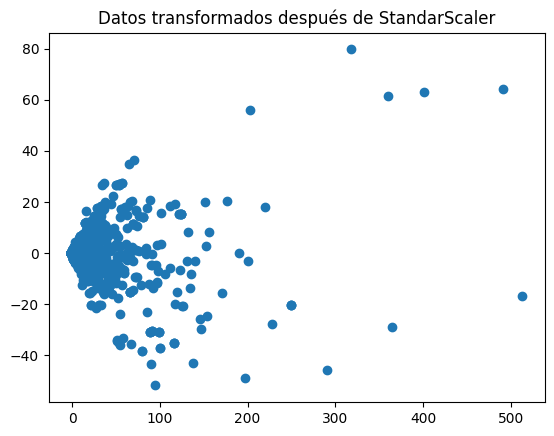

In [48]:
plt.scatter(numerical_data_preprocessed[:, 0], numerical_data_preprocessed[:, 1])
plt.title('Datos transformados después de StandarScaler')
plt.show()

In [51]:
numerical_data

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,new_column
0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,2.200000e+03,2.200000e+03,2.200000e+03,2.209000e+03,2.208000e+03,2.206000e+03,2.208000e+03,2.207000e+03,2.207000e+03,0
1,16667.0,18333.0,16667.0,18333.0,16667.0,18333.0,16667.0,20000.0,16667.0,20000.0,...,3.143700e+04,3.396500e+04,3.636600e+04,3.377900e+04,3.462200e+04,3.627100e+04,3.417900e+04,3.450700e+04,3.483100e+04,0
2,1000.0,1100.0,1000.0,1100.0,1000.0,1100.0,1000.0,1200.0,1000.0,1200.0,...,6.916190e+03,7.472330e+03,8.000600e+03,7.463040e+03,7.645320e+03,8.000960e+03,7.546090e+03,7.616670e+03,7.687240e+03,0
3,4820.0,4820.0,4820.0,5100.0,5370.0,5930.0,6620.0,6480.0,6590.0,6630.0,...,9.005000e+03,9.116000e+03,8.595000e+03,1.806700e+04,1.851000e+04,1.771900e+04,1.748100e+04,2.708200e+04,2.265000e+04,0
4,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,88671.0,91667.0,91047.0,87632.0,...,9.994400e+04,9.618900e+04,2.081900e+04,7.296000e+04,5.893400e+04,7.300800e+04,7.538900e+04,7.661500e+04,7.527900e+04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,272582266.0,271387833.0,277107648.0,283628226.0,292004991.0,299591021.0,302802693.0,309364878.0,311729733.0,317320177.0,...,8.292806e+08,8.418313e+08,8.714974e+08,8.945766e+08,9.105471e+08,9.640792e+08,9.790694e+08,9.840232e+08,1.004309e+09,0
51445,6893267.0,7032332.0,7177173.0,7211819.0,7449207.0,7341616.0,7559617.0,7663850.0,8128283.0,8609639.0,...,1.945307e+07,1.994979e+07,2.065808e+07,2.155702e+07,2.182914e+07,2.152827e+07,2.259705e+07,2.296227e+07,2.379404e+07,0
51446,52242.0,52597.0,52202.0,53015.0,53742.0,54169.0,55325.0,55388.0,54497.0,54690.0,...,9.398600e+04,9.428700e+04,9.330100e+04,9.169300e+04,9.657700e+04,9.958700e+04,9.785400e+04,1.005800e+05,1.012810e+05,0
51447,36012146.0,36987704.0,37466066.0,38233394.0,40033648.0,39768690.0,41823744.0,42448571.0,44296728.0,47085868.0,...,1.828309e+08,1.881010e+08,1.927428e+08,1.976623e+08,2.108202e+08,2.143944e+08,2.211219e+08,2.309543e+08,2.409892e+08,0


In [52]:
array2 = numerical_data.values

In [53]:
print(array2.shape)


(51449, 63)


In [54]:
print(array2.shape)
x_class2 = array2[ : , 0:62]
y_class2 = array2[ : , 62]

(51449, 63)


In [55]:
x_class2
features2=x_class2
scaler2=MinMaxScaler(feature_range=(0,1))
rescalerx2=scaler2.fit_transform(features2)
rescalerx2

array([[4.47023855e-07, 4.41146774e-07, 4.38350771e-07, ...,
        7.35108741e-07, 7.18596620e-07, 7.21326619e-07],
       [1.24175777e-05, 1.34792397e-05, 1.21766538e-05, ...,
        1.13792036e-05, 1.12354389e-05, 1.13840179e-05],
       [7.45039759e-07, 8.08769086e-07, 7.30584618e-07, ...,
        2.51231735e-06, 2.47997885e-06, 2.51246526e-06],
       ...,
       [3.89223671e-05, 3.86716614e-05, 3.81379782e-05, ...,
        3.25785012e-05, 3.27487304e-05, 3.31022570e-05],
       [2.68304806e-02, 2.71950105e-02, 2.73721315e-02, ...,
        7.36180494e-02, 7.51984596e-02, 7.87639143e-02],
       [1.37592666e-01, 1.38314902e-01, 1.40318948e-01, ...,
        1.73691022e-01, 1.71340170e-01, 1.76179070e-01]])

In [50]:
numerical_data['new_column'] = 0

<ipython-input-50-d1ac90531877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['new_column'] = 0


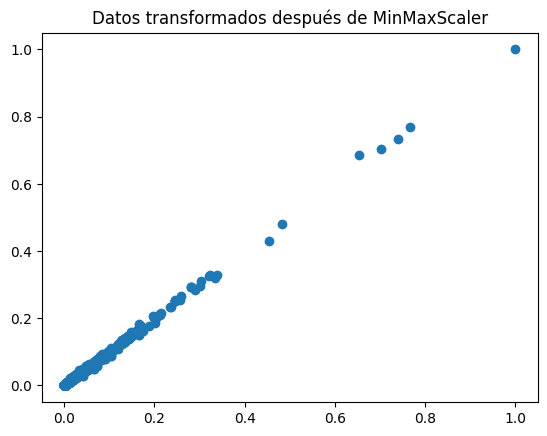

In [56]:
plt.scatter(rescalerx2[:, 0], rescalerx2[:, 1])
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
plt.title('Datos transformados después de MinMaxScaler')
plt.show()

In [57]:
categorical_data_preprocessed

array([[1.        , 0.08510638, 0.08      , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.08510638, 0.08      , ..., 0.        , 0.11111111,
        0.        ],
       [1.        , 0.08510638, 0.08      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.11111111,
        0.        ],
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.        ,
        1.        ],
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.04347826,
        0.        ]])

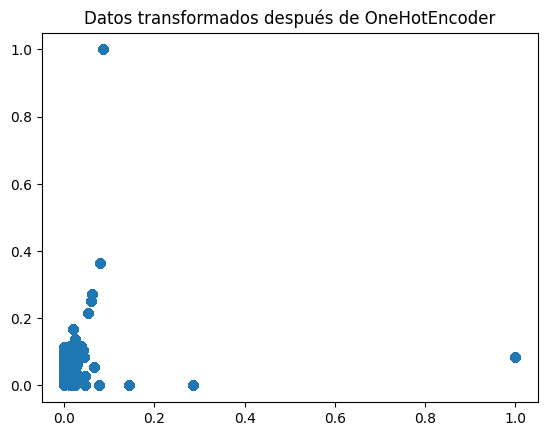

In [58]:
plt.scatter(categorical_data_preprocessed[:, 0], categorical_data_preprocessed[:, 1])
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
plt.title('Datos transformados después de OneHotEncoder')
plt.show()

In [60]:
dfp2 = pd.DataFrame({'Área': vectorized_A,'Elemento': vectorized_E,'Producto': vectorized_P,'Unidad': vectorized_U})

In [61]:
dfp2

,Área,Elemento,Producto,Unidad
0,0,7,3,9
1,0,4,3,2
2,0,3,3,10
3,0,7,9,9
4,0,4,9,2
...,...,...,...,...
51444,85,1,193,6
51445,85,7,213,9
51446,85,4,213,2
51447,85,3,213,10


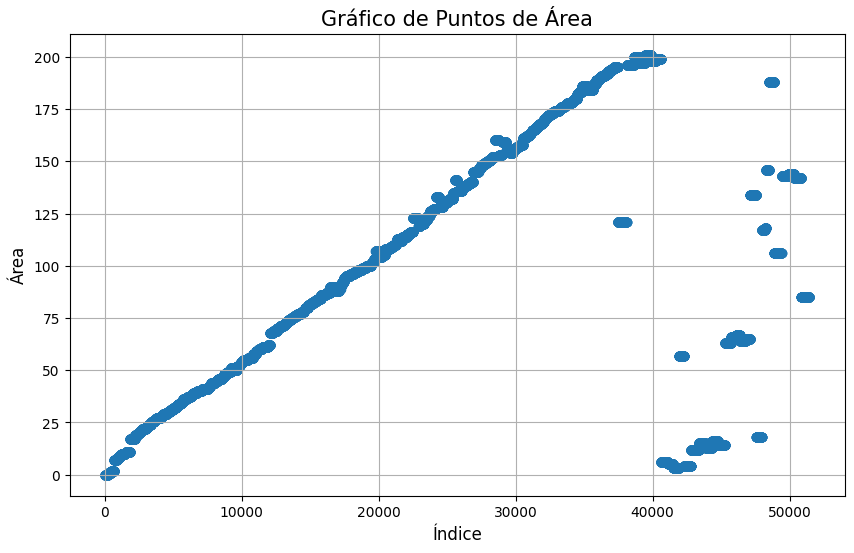

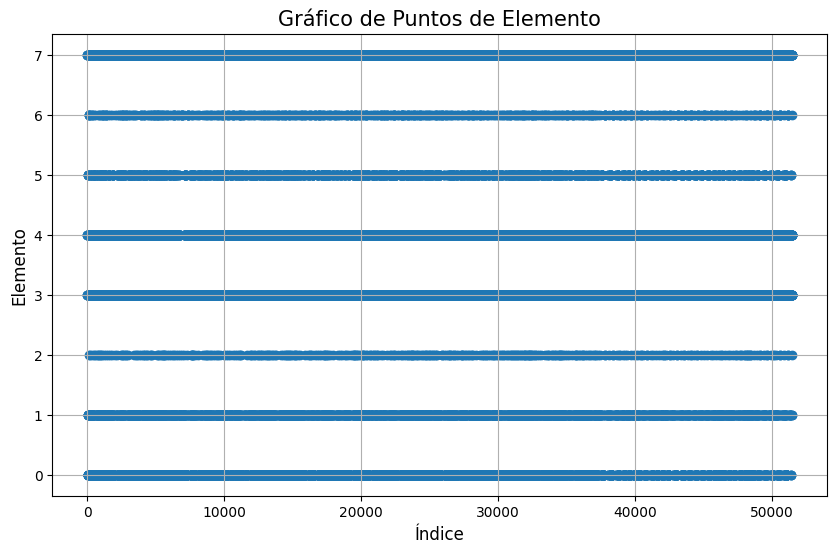

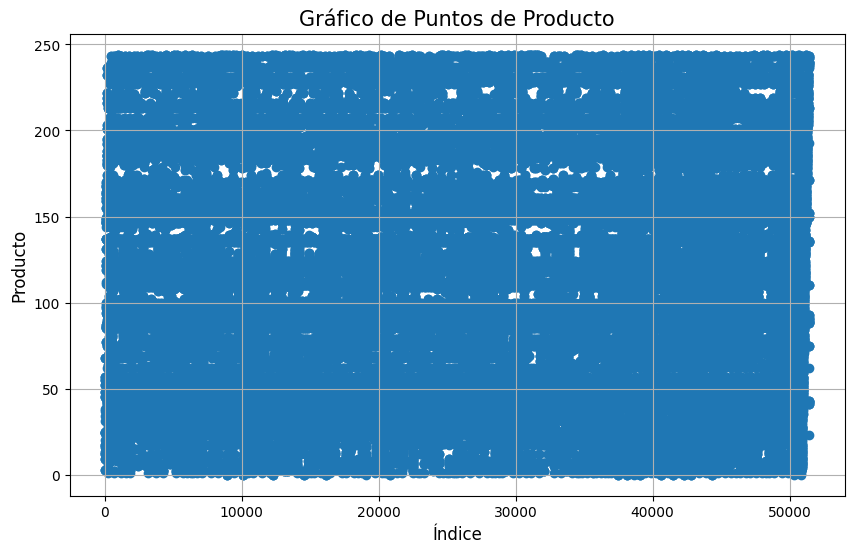

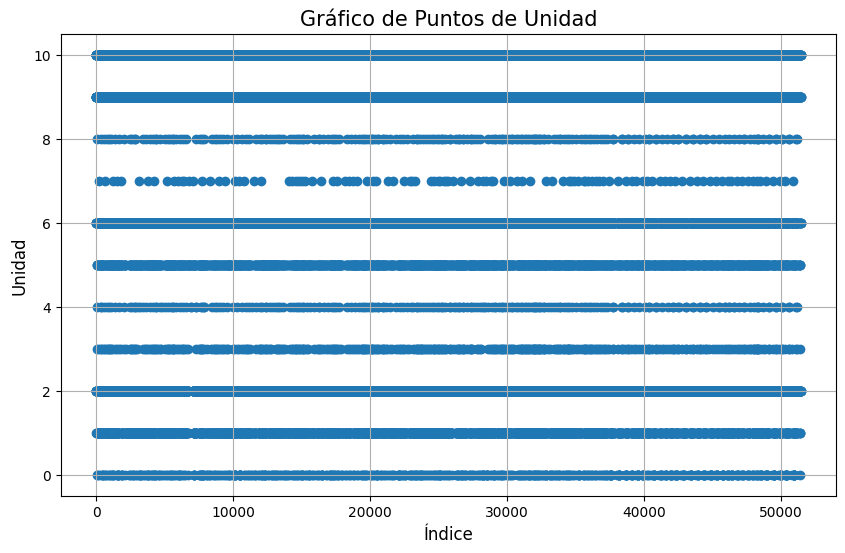

In [62]:
for column in dfp2.columns:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
    plt.scatter(dfp2.index, dfp2[column])  # Gráfico de puntos
    plt.title(f'Gráfico de Puntos de {column}', fontsize=15)
    plt.xlabel('Índice', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(True)  # Agrega una cuadrícula
    plt.show()